
## Problem Statement
We have been tasked with estimating daily cases for two separate business segments aggregated at the country level for the next three months, taking into account the following significant Indian holidays (not a complete list): Diwali, Dussehra, Ganesh Chaturthi, Navratri, Holi, and other Hindu festivals (You are free to use any publicly available open source external datasets). Other instances may include:

Weather Macroeconomic variables Note that the external dataset must belong to a reliable source.

Weather and macroeconomic factors It's worth noting that the external dataset must come from a reputable source.

Dictionary of Data The train information was delivered in the following format:

* Historical data for business sector 1 has been made accessible at the branch ID level. Historical data for business sector 2 has been made accessible at the state level.

File Variable Training application date is a term that is defined as follows: Segment of application date 1/2 of the business segment branch id An anonymous identifier for the branch where the application was received The state where the application was submitted (Karnataka, MP etc.) state where the application was received (Central, East etc.) case count is a function that counts the number of cases (Target) The number of cases/applications that have been received

Forecasting for the dates supplied in the test set for each section must be done at the nation level.

id of a variable definition Application date for each sample in the test set with a unique id Segment of application date 1/2 of the business segment

### Evaluation
Metrics for Evaluation **MAPE (Mean Absolute Percentage Error)* M is the assessment metric for rating the forecasts, following the formula:


Where At denotes the current value and Ft denotes the predicted value.

For both portions, the final score is derived using MAPE and the formula:

### Important Notes

When deciding on the winners, the practicality of implementing the best ideas will be taken into account. Both business groups must be satisfied with the outcome of the solution.

The data from the public and private split tests is separated into two categories: public (1st month) and private (2nd month) (Next 2 months)

In [1]:


import numpy as np 
import pandas as pd 

import pandas
import matplotlib.pyplot as plt
%matplotlib inline


### Loading data with MAPE

- Loadig the train and test dataset from pandas.
- Mean Absolute percentage error (MAPE) of predicted and true values.



In [2]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



### Formatting the Date
This date format can be the strings data (yyyymmdd) must match the format specified (%d%m%Y).

In [3]:
train['application_date']=pd.to_datetime(train['application_date'],format='%d-%m-%Y')
test['application_date']=pd.to_datetime(test['application_date'],format='%d-%m-%Y')

### Data Exploration
Exploring the parameter values with mean count

In [4]:
train.groupby(['application_date','segment','branch_id']).mean().reset_index()

,application_date,segment,branch_id,no_of_applicants
0,2017-04-01,1,1.0,40
1,2017-04-01,1,3.0,58
2,2017-04-01,1,5.0,10
3,2017-04-01,1,7.0,2
4,2017-04-01,1,8.0,13
...,...,...,...,...
64403,2019-06-05,1,267.0,0
64404,2019-06-05,1,268.0,0
64405,2019-06-05,1,269.0,0
64406,2019-06-05,1,270.0,9


### Group by count column is some sort of index 
- Splitting and grouping data for train and test by segment 1 and segment 2.

In [5]:

train_s1=train[train['segment']==1].groupby(['application_date']).sum().reset_index()[['application_date','no_of_applicants']].sort_values('application_date').set_index('application_date')
train_s2=train[train['segment']==2].groupby(['application_date']).sum().reset_index()[['application_date','no_of_applicants']].sort_values('application_date').set_index('application_date')
test_s1=test[test['segment']==1][['application_date']].sort_values('application_date').set_index('application_date')
test_s2=test[test['segment']==2][['application_date']].sort_values('application_date').set_index('application_date')

In [6]:
train_s1.head(10)

,no_of_applicants
application_date,
2017-04-01,299
2017-04-03,42
2017-04-04,23
2017-04-05,1530
2017-04-07,1341
2017-04-12,1468
2017-04-13,1340
2017-04-14,1330
2017-04-15,981


Checking the Unique Values.

In [7]:
for k in train.columns:
    print(k,train[k].nunique())

application_date 814
segment 2
branch_id 83
state 20
zone 5
no_of_applicants 3182


### Getting Holidays List
- A fast, efficient Python holiday library for generating country, province and state specific sets of holidays on the fly. It aims to make determining whether a specific date is a holiday as fast and flexible as possible.
- Holiday list from 1-4-2017 to 31-12-2019

In [8]:
import holidays
ind_holidays = holidays.IND(years=[2017,2018,2019])

from datetime import date
hol=[]
for date, name in sorted(ind_holidays.items()):
#     print(str(date))
    hol.append(str(date))
hol

['2017-01-14',
 '2017-01-26',
 '2017-05-01',
 '2017-08-15',
 '2017-10-02',
 '2017-12-25',
 '2018-01-14',
 '2018-01-26',
 '2018-05-01',
 '2018-08-15',
 '2018-10-02',
 '2018-12-25',
 '2019-01-14',
 '2019-01-26',
 '2019-05-01',
 '2019-08-15',
 '2019-10-02',
 '2019-12-25']

### Data Visualization


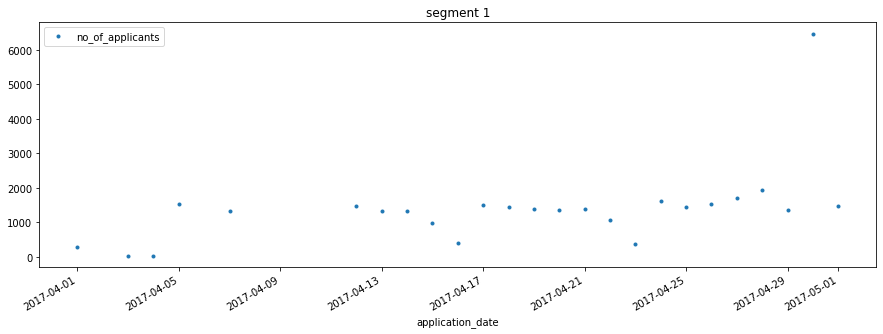

In [9]:
train_s1['2017-04-01':'2017-05-01'].plot(style='.', figsize=(15,5), title='segment 1')

From the above plot we can see that no of applicants in a particular month defined.

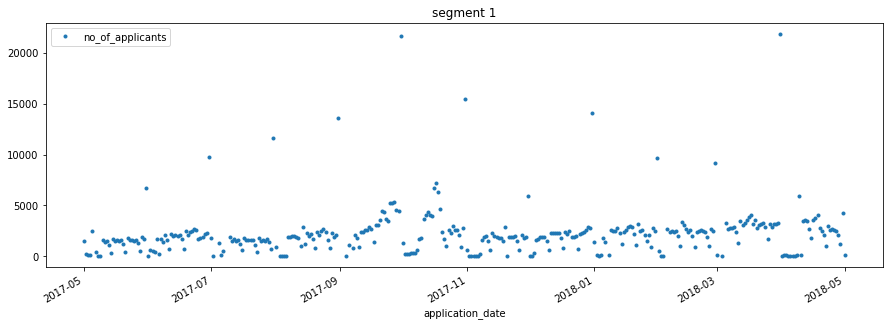

In [10]:
train_s1['2017-05-01':'2018-05-01'].plot(style='.', figsize=(15,5), title='segment 1')

From the above plot we can see that no of applicants in a Year defined.

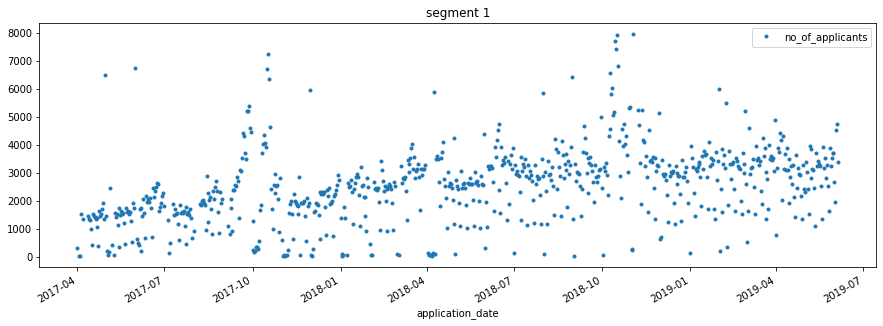

In [11]:
train_s1[(train_s1.no_of_applicants<8000) & (train_s1.no_of_applicants>15)].plot(style='.', figsize=(15,5), title='segment 1')

The above plot we can visualize no.applicants ranging between 15 to 8000 from segment-1.

### Missing Values
- Use np.nan()  to compare NaN values.
- np.nan applied for handling the missing values in the segment-1 and segment-2.

In [13]:
train_s1.loc[train_s1.no_of_applicants>=8000,'no_of_applicants']=np.nan
# train_s1.loc[train_s1.case_count<15,'case_count']=np.nan
train_s1=train_s1[train_s1.no_of_applicants>15]

In [14]:
train_s2.loc[train_s2.no_of_applicants>40000,'no_of_applicants']=np.nan

In [15]:
pd.plotting.register_matplotlib_converters()

In [ ]:
train_s2.plot(style='.', figsize=(15,5), title='segment 2')

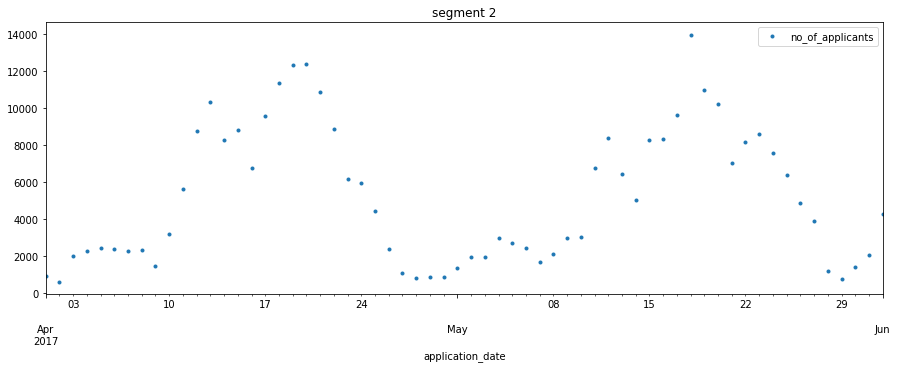

In [18]:
train_s2['2017-04-01':'2017-06-01'].plot(style='.', figsize=(15,5), title='segment 2')

From the above plot we can see that no of applicants in a particular month defined.

In [19]:
train_s2.loc[train_s2.no_of_applicants>40000,'no_of_applicants']=np.nan

Getting information of Segment 1 test data

In [20]:
test_s1

""
application_date
2019-06-06
2019-06-07
2019-06-08
2019-06-09
2019-06-10
2019-06-11
2019-06-12
2019-06-13
2019-06-14


### Creating function to create features on 'Application Date' for modeling
- splitting of date into diffrent date formats.
- Creating a separate target feature.

In [21]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(train_s1, label='no_of_applicants')

features_and_target = pd.concat([X, y], axis=1)
features_and_target.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,no_of_applicants
application_date,,,,,,,,
2017-04-01,5,2,4,2017,91,1,13,299.0
2017-04-03,0,2,4,2017,93,3,14,42.0
2017-04-04,1,2,4,2017,94,4,14,23.0
2017-04-05,2,2,4,2017,95,5,14,1530.0
2017-04-07,4,2,4,2017,97,7,14,1341.0


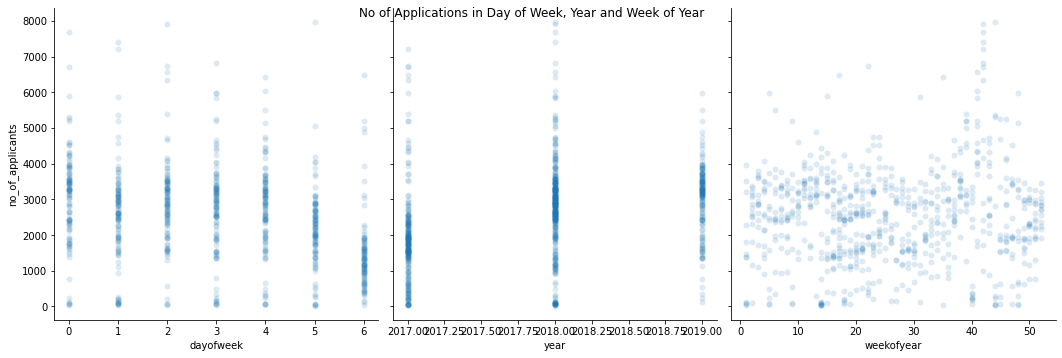

In [38]:
import seaborn as sns
sns.pairplot(features_and_target.dropna(),
             x_vars=['dayofweek',
                     'year','weekofyear'],
             y_vars='no_of_applicants',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('No of Applications in Day of Week, Year and Week of Year')
plt.show()

Visualizing no of applications in Day of Week, Year and Week of Year

##Modeling (Prophet Model)
- Prophet is a time series data forecasting process based on an additive model in which non-linear trends are fitted with annual, weekly, and daily seasonality, as well as holiday impacts. It works well with historical data from several seasons and time series with substantial seasonal influences. Prophet is resilient to missing data and trend alterations, and outliers are often adequately handled.
- Fbprophet requires the installation of a few libraries, like as Pandas, Matplotlib, Numpy, Warnings (extraordinary), Jupyter Notebook, or Lab.

The following are the stages involved in performing predictive analysis using the Fbprophet library:

a. Installing the required libraries

b. Using the Pandas library to import the information.

c. Data preprocessing, which involves ignoring all but two columns: the date column and the target column. Converting the date column to Date Time format and renaming both columns to "ds" for date and "y" for goal are also recommended. You can also utilise feature scaling techniques like normalisation and standardisation to speed up code execution and improve predictions.

d. Using the Prophet library to fit/train the whole model.

e. Using the Prophet to create fresh data and then forecasting the result based on that data.

f. Plotting the obtained prediction.






In [25]:
from fbprophet.plot import add_changepoints_to_plot
def func(df,split_date,seg):
    split_date = split_date
    pd.plotting.register_matplotlib_converters()
    tr_s1 = df.loc[df.index <= split_date].copy()
    ts_s1 = df.loc[df.index > split_date].copy()
    ts_s1.rename(columns={'no_of_applicants': 'TEST SET'}).join(tr_s1.rename(columns={'no_of_applicants': 'TRAINING SET'}),how='outer').plot(figsize=(15,5), title='case count', style='.')
    plt.show()


#### Model Building
step -1 Choosing the parameteres 
- growth (String 'linear' or 'logistic' to specify a linear or logistic) – trend.
- seasonality_mode ('additive' (default) or 'multiplicative'.) 
- yearly_seasonality (Fit yearly seasonality.) – Can be ‘auto’, True, False, or a number of Fourier terms to generate.

- weekly_seasonality (Fit weekly seasonality.) – Can be ‘auto’, True, False, or a number of Fourier terms to generate.

- daily_seasonality (Fit daily seasonality.) – Can be ‘auto’, True, False, or a number of Fourier terms to generate.

- using conditional seasonality also apart from weekly, yearly and daily seasonality the main reason to go for conditional seasonality is — the default weekly seasonality assumes the pattern of weekly seasonality is the same throughout the year.


In [ ]:
 from fbprophet import Prophet
    from fbprophet.diagnostics import cross_validation
    params={}

    model=Prophet(**params)
    if seg=='s1':
        

        params={'growth':'linear','seasonality_mode':'additive','yearly_seasonality':True,'weekly_seasonality':True,'daily_seasonality':True}
        model = Prophet(**params).add_seasonality(name='monthly',period=30.5,fourier_order=5)\
            .add_seasonality(name='yearly',period=365.25,fourier_order=5)\
            .add_seasonality(name='quarter',period=365.25/4,fourier_order=5).add_seasonality(name='sem',period=365.25/2,fourier_order=5)\
        .add_seasonality(name='weekly',period=7,fourier_order=5).add_seasonality(name='s1',period=365.25/8,fourier_order=5).add_seasonality(name='weekly 1',period=5,fourier_order=5)
    else:
        params={'growth':'linear','seasonality_mode':'additive','yearly_seasonality':True,'weekly_seasonality':True,'daily_seasonality':True}
        model = Prophet(**params).add_seasonality(name='weekly',period=7,fourier_order=20).add_seasonality(name='monthly',period=30.5,fourier_order=20)\
            .add_seasonality(name='yearly',period=365.25,fourier_order=20).add_seasonality(name='weekly 1',period=5,fourier_order=5).add_seasonality(name='monthly 2',period=14,fourier_order=5)\
        .add_seasonality(name='quarter',period=365.25/4,fourier_order=5)

#### Model Fitting to Segement-1
- We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the given dataframe
- Predictions are then made on a dataframe with a column ds containing the dates.  
- The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
   model.fit(tr_s1.reset_index().rename(columns={'application_date':'ds','no_of_applicants':'y'}))
    ts_s1_p = model.predict(df=ts_s1.reset_index().rename(columns={'application_date':'ds'}))
    cv = cross_validation(model,horizon = '90 days')
    print('MAPE CV ',mean_absolute_percentage_error(y_true=cv.y,y_pred=cv.yhat))
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    fig = model.plot(ts_s1_p,ax=ax)
    plt.show()
    
    fig = model.plot_components(ts_s1_p)

The Above forecast shows functionality for time series cross validation to measure forecast error using given data.

In [ ]:
    # Plot the forecast with the actuals
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    ax.scatter(ts_s1.index, ts_s1['no_of_applicants'], color='r')
    fig = model.plot(ts_s1_p, ax=ax)

The Above forecat shows the actual value.

In [ ]:
   # Plot the forecast with the actuals
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    ax.scatter(ts_s1.index, ts_s1['no_of_applicants'], color='r')
    fig = model.plot(ts_s1_p, ax=ax)
    ax.set_xbound(lower=ts_s1.index.min(),upper=ts_s1.index.max())
    ax.set_ylim(0, 60000)
    plot = plt.suptitle('Forecast vs Actuals')
    print('MAPE ERROR',mean_absolute_percentage_error(y_true=ts_s1['no_of_applicants'],y_pred=ts_s1_p['yhat']))
    return params

The plot is created to comparing the actual vs. predicted values. In this case, we can see that the forecast is a good fit. The model has skill and forecast that looks sensible.

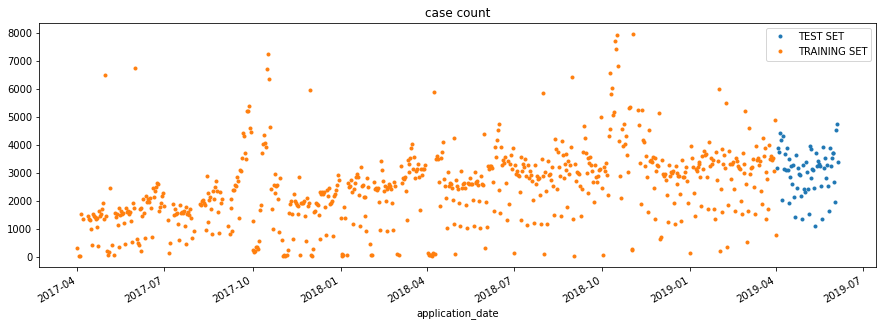

INFO:fbprophet:Making 7 forecasts with cutoffs between 2018-04-06 00:00:00 and 2019-01-01 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

MAPE CV  94.93483917632332


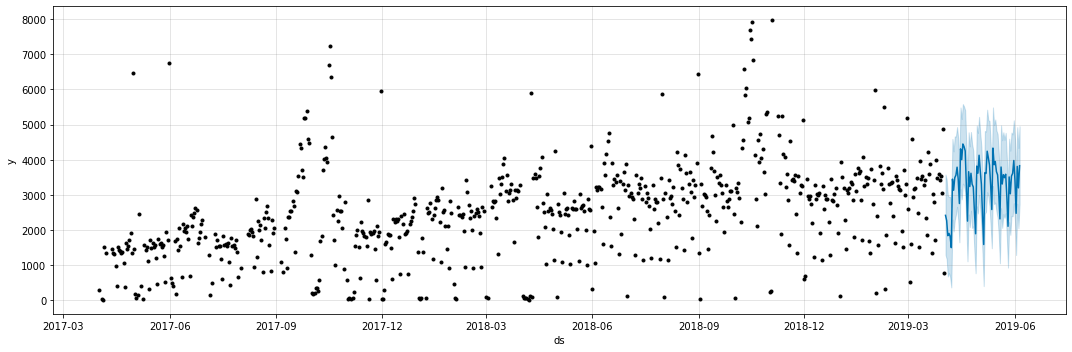

MAPE ERROR 25.204631418370305


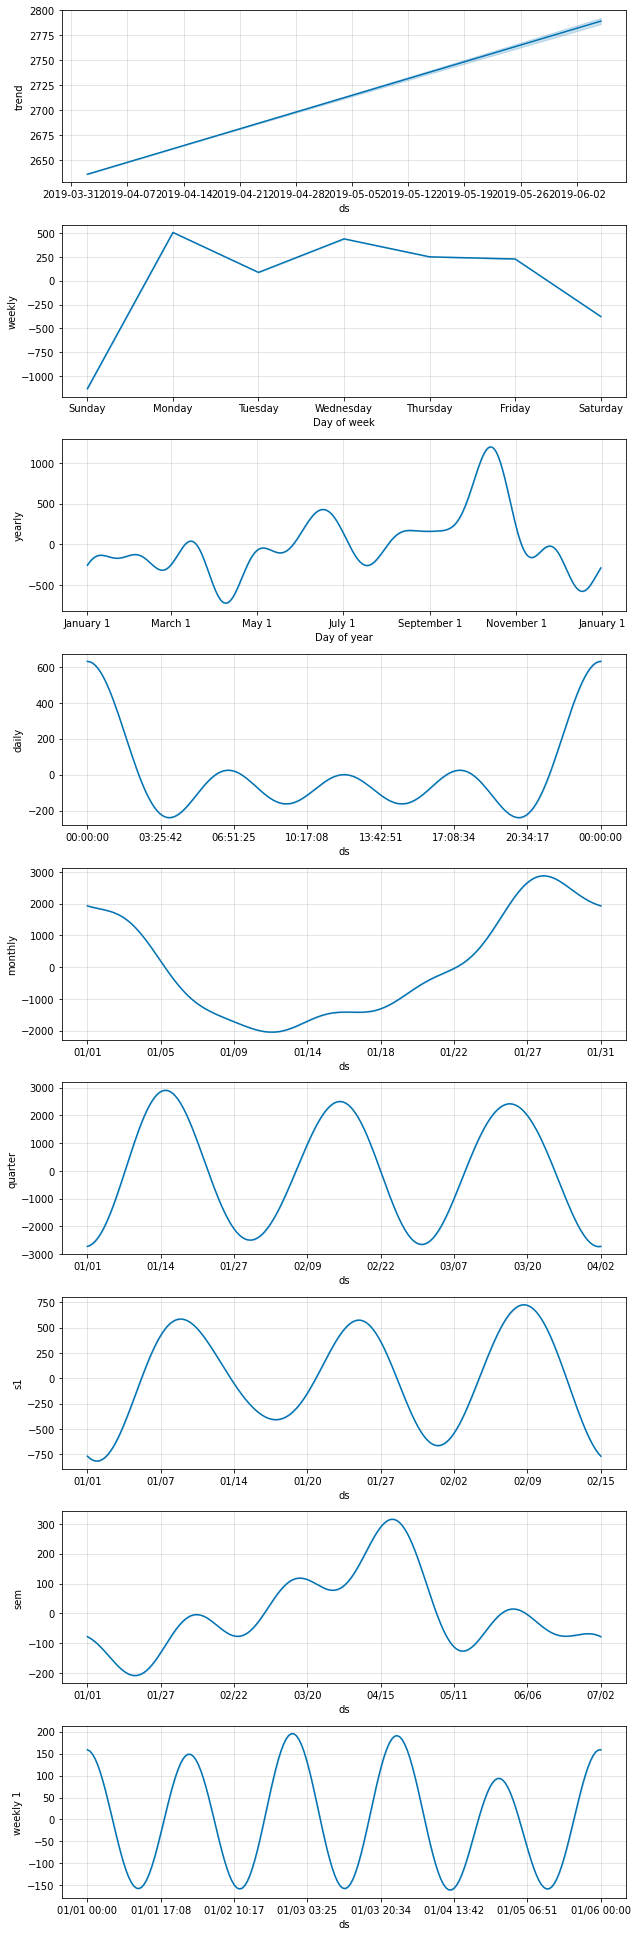

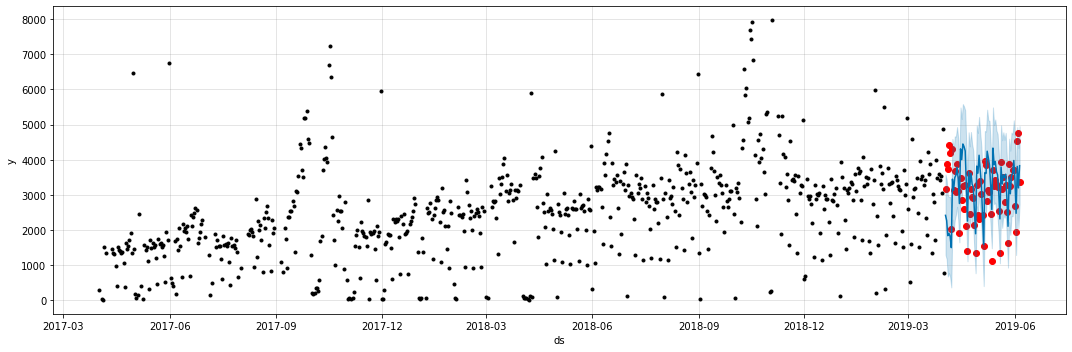

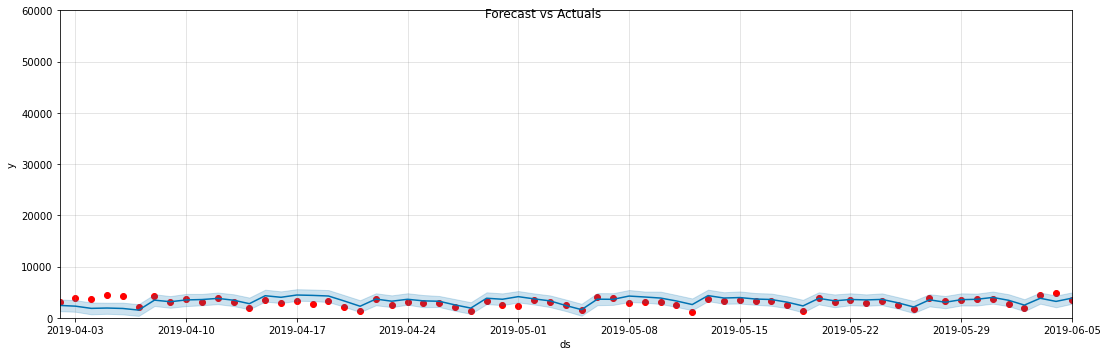

In [26]:
par={}
par['s1']=func(train_s1,'2019-04-01','s1')

#### Segment-1 
- Average MAPE from CV, normalized with the persistence forecaster MAPE, plotted as a function of monthly,monthly2, weekly,yearly,daily ,quarter (vertical axis) and hour ahead time of the prediction (horizontal axis). The regions inside violet contours are the ones in which the persistence model has a better MAPE.
- The forecasting performance targets (such as MAPE < 10% is Excellent, MAPE < 20% is Good) without the context of the forecastability of your data.
- The above images shows the trends and seasonality of the time series data. We can see there is an increasing trend, meaning the number of application has increased over time. If we look at the seasonality graph, we can see that September and November is the time with most applications at a given year.

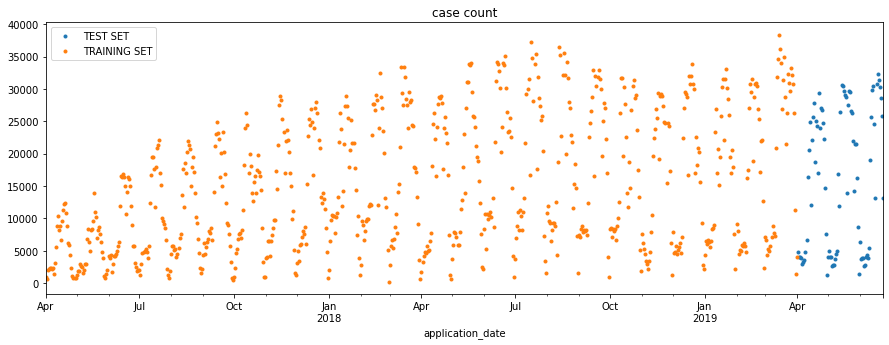

INFO:fbprophet:Making 7 forecasts with cutoffs between 2018-04-06 00:00:00 and 2019-01-01 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

MAPE CV  44.16081430656751


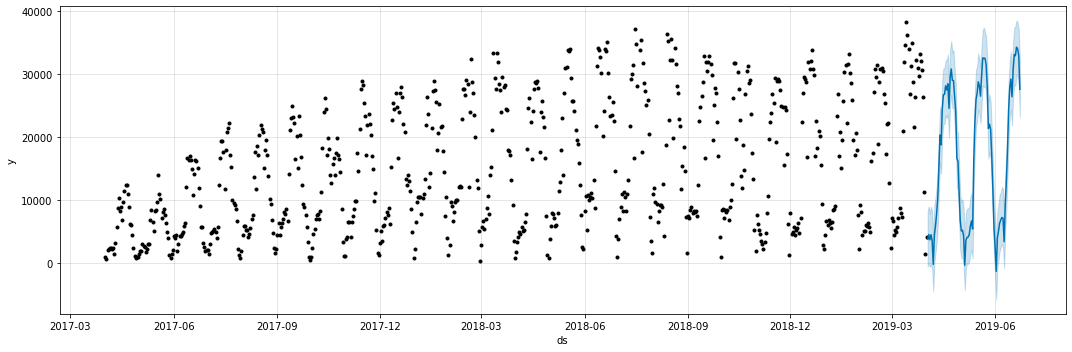

MAPE ERROR 44.66512774627735


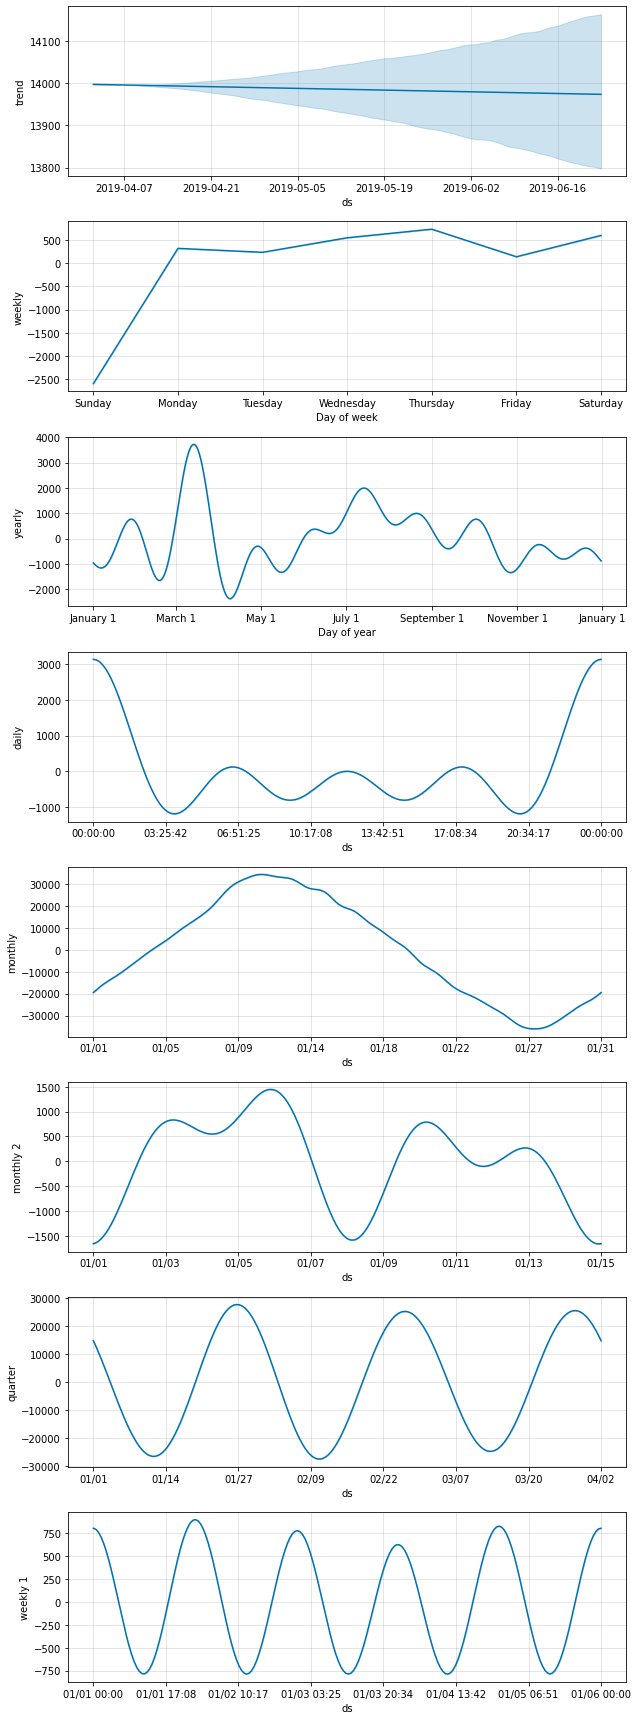

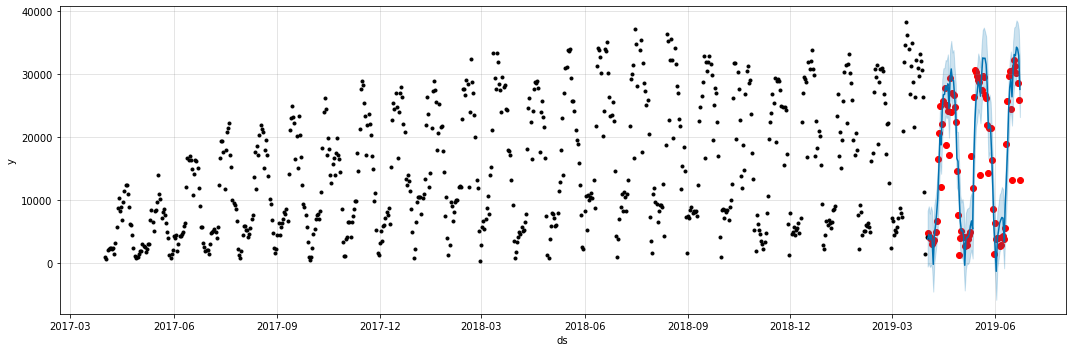

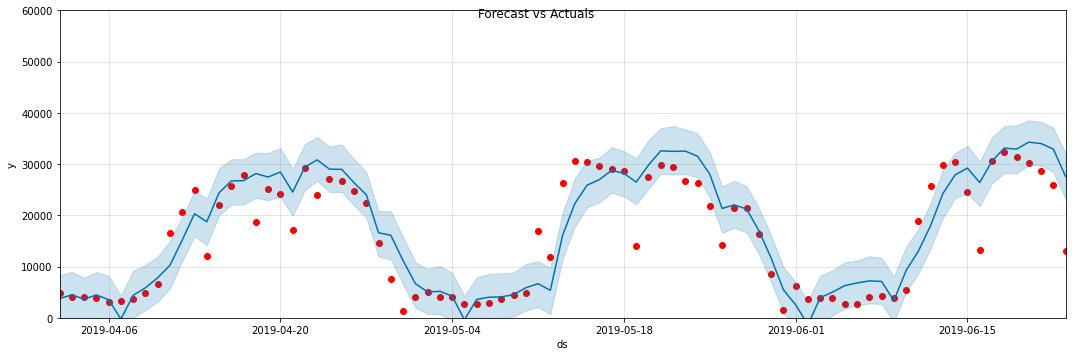

In [27]:
par['s2']=func(train_s2,'2019-04-01','s2')

#### Segment-2
- Average MAPE from CV, normalized with the persistence forecaster MAPE, plotted as a function of monthly,monthly2, weekly,yearly,daily ,quarter (vertical axis) and hour ahead time of the prediction (horizontal axis). The regions inside violet contours are the ones in which the persistence model has a better MAPE.
- The forecasting performance targets (such as MAPE < 10% is Excellent, MAPE < 20% is Good) without the context of the forecastability of your data.
- The above images shows the trends and seasonality of the time series data. We can see there is an constant trend, meaning the number of application has constant over time. If we look at the seasonality graph, we can see that March  and May is the time with most applications at a given year.

In [28]:

par

{'s1': {'daily_seasonality': True,
  'growth': 'linear',
  'seasonality_mode': 'additive',
  'weekly_seasonality': True,
  'yearly_seasonality': True},
 's2': {'daily_seasonality': True,
  'growth': 'linear',
  'seasonality_mode': 'additive',
  'weekly_seasonality': True,
  'yearly_seasonality': True}}

In [29]:
# Setup and train model and fit
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

### Cross Validation S1 and S2
- We can perform cross validation to measure forecast error. Cut off points are selected and we train the model with data up to that point. We can then compare the prediction vs actual data over a specified time horizon. This can be done using the cross_validation function. The parameter period specifies the interval between cut off points.
- The resulting data frame can now be used to compute error measures of yhat vs. y. Below I’ve plotted a chart with some markers to help you understand in a more visual way. In this example, we have a one year horizon and the model will make predictions for each quarter of year (~90 days).
- The new 3 months forecast does look sensible, at least by eye.we can see that the forecasted 3 months of segment-2 is a good match for the real observations, especially when the bounds are taken into account.



INFO:fbprophet:Making 27 forecasts with cutoffs between 2018-04-11 00:00:00 and 2019-05-06 00:00:00


  0%|          | 0/27 [00:00<?, ?it/s]

75.08905774191923


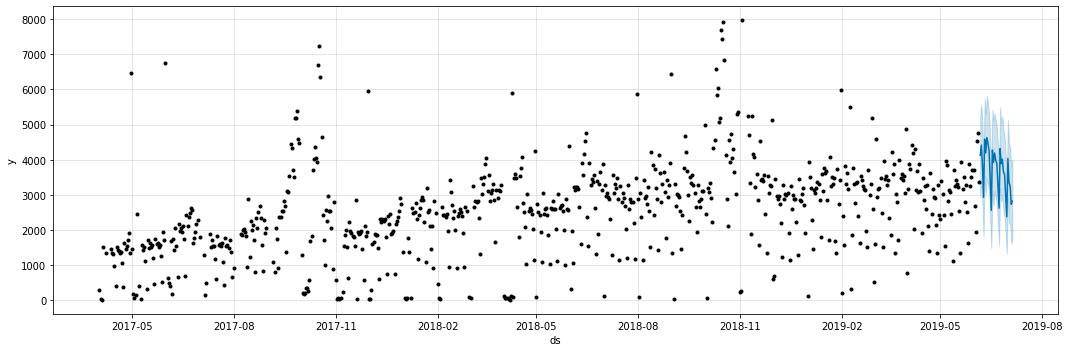

In [39]:
model = Prophet(**par['s1']).add_seasonality(name='monthly',period=30.5,fourier_order=5)\
            .add_seasonality(name='yearly',period=365.25,fourier_order=5)\
            .add_seasonality(name='quarter',period=365.25/4,fourier_order=5).add_seasonality(name='sem',period=365.25/2,fourier_order=5)\
        .add_seasonality(name='weekly',period=7,fourier_order=5).add_seasonality(name='s1',period=365.25/8,fourier_order=5).add_seasonality(name='weekly 1',period=5,fourier_order=5)
model.fit(train_s1.reset_index().rename(columns={'application_date':'ds','no_of_applicants':'y'}))
y_s1 = model.predict(test_s1.reset_index().rename(columns={'application_date':'ds'}))
cv = cross_validation(model,horizon = '90 days')
print(mean_absolute_percentage_error(y_true=cv.y,y_pred=cv.yhat))
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(y_s1,ax=ax)
plt.show()

INFO:fbprophet:Making 28 forecasts with cutoffs between 2018-04-14 00:00:00 and 2019-05-24 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

40.444327443180974


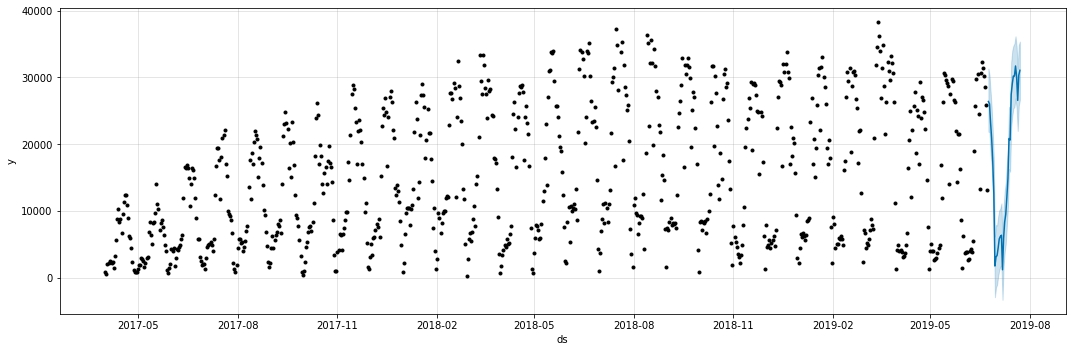

In [40]:
model=Prophet(**par['s2']).add_seasonality(name='weekly',period=7,fourier_order=20).add_seasonality(name='monthly',period=30.5,fourier_order=20)\
            .add_seasonality(name='yearly',period=365.25,fourier_order=20).add_seasonality(name='weekly 1',period=5,fourier_order=5).add_seasonality(name='monthly 2',period=14,fourier_order=5)\
        .add_seasonality(name='quarter',period=365.25/4,fourier_order=5)
model.fit(train_s2.reset_index().rename(columns={'application_date':'ds','no_of_applicants':'y'}))
y_s2 = model.predict(test_s2.reset_index().rename(columns={'application_date':'ds'}))
cv = cross_validation(model,horizon = '90 days')
print(mean_absolute_percentage_error(y_true=cv.y,y_pred=cv.yhat))
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(y_s2,ax=ax)
plt.show()

In [41]:
test.loc[test.segment==1, 'no_of_applicants']=y_s1['yhat'].values
test.loc[test.segment==2, 'no_of_applicants']=y_s2['yhat'].values

In [42]:
sum(y_s2['yhat'].values<0)

0

In [43]:
test[test['no_of_applicants']<0]
test.loc[test.no_of_applicants<0,'no_of_applicants']=0

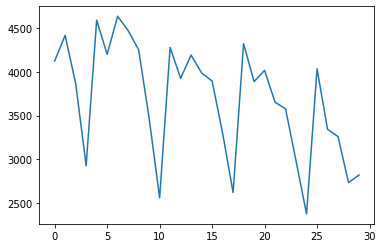

In [46]:
test[test.segment==1]['no_of_applicants'].plot()

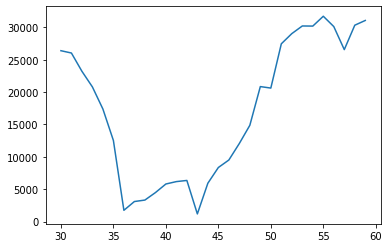

In [44]:
test[test.segment==2]['no_of_applicants'].plot()

In [45]:
test.to_csv('submission.csv',index=False)

###Conclusion

- Prophet is easy and intuitive to use and the components of the model are easily explainable. It also allows the incorporation of domain knowledge into the model, for example via known change points or capacity limits. The forecasts are pretty decent but in some cases certain parameters have to be tweaked compared to the default setting, which is easily done.